In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf


In [3]:
data = pd.read_csv('50_Startups (1).csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
data.shape

(50, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [11]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [12]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


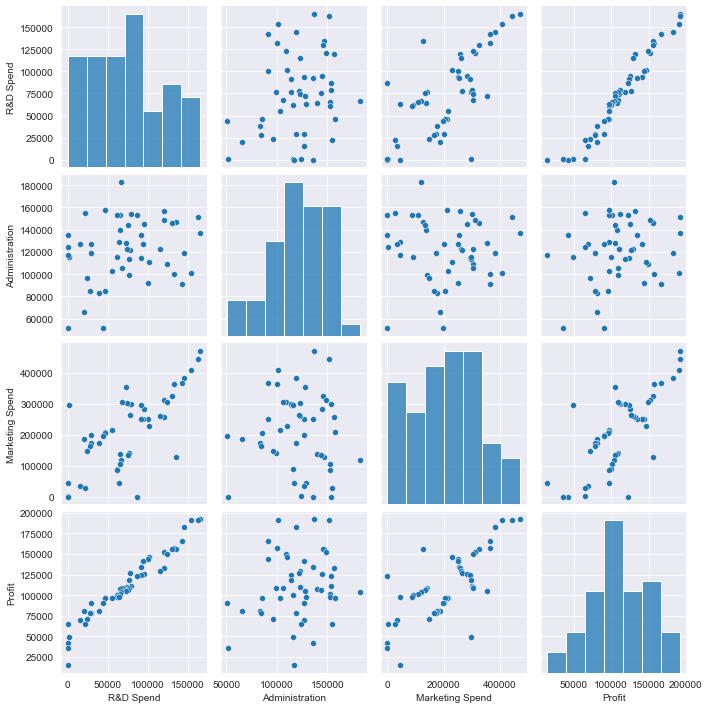

In [13]:
sns.set_style('darkgrid')
sns.pairplot(data)

In [18]:
rd = pd.DataFrame(data['R&D Spend'])
ms = pd.DataFrame(data['Marketing Spend'])

In [20]:
model = smf.ols('Profit ~ Administration+ms+rd', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           4.53e-30
Time:                        11:46:49   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
ms                 0.0272      0.016      1.655      0.105      -0.006       0.060
rd                 0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From above summary, we know that administration and Market spend are insignificant. So, we check them individually

In [22]:
M_a = smf.ols('Profit~Administration', data = data).fit()
M_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 28 Jun 2022   Prob (F-statistic):              0.162
Time:                        11:49:10   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
M_ms = smf.ols('Profit~ms', data = data).fit()
M_ms.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           4.38e-10
Time:                        11:49:52   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
ms             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Hence from above two simple linear models with administration and market spend, We realise that administration is totally insignificant and market spend is significant. Also, there is no multi collinearity problem in this data, since both the independent insignificant variable do not have any correlation between them.


# Residual analysis

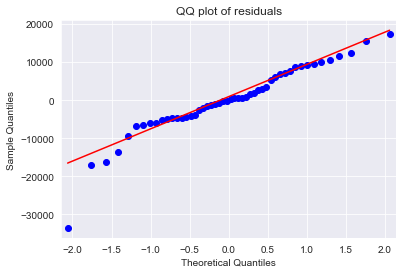

In [27]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line = 'q')
plt.title('QQ plot of residuals')
plt.show()

In [29]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

<function matplotlib.pyplot.show(close=None, block=None)>

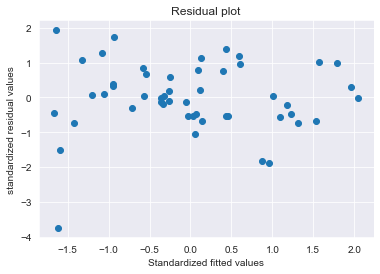

In [30]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values( model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('standardized residual values')
plt.show

In [33]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

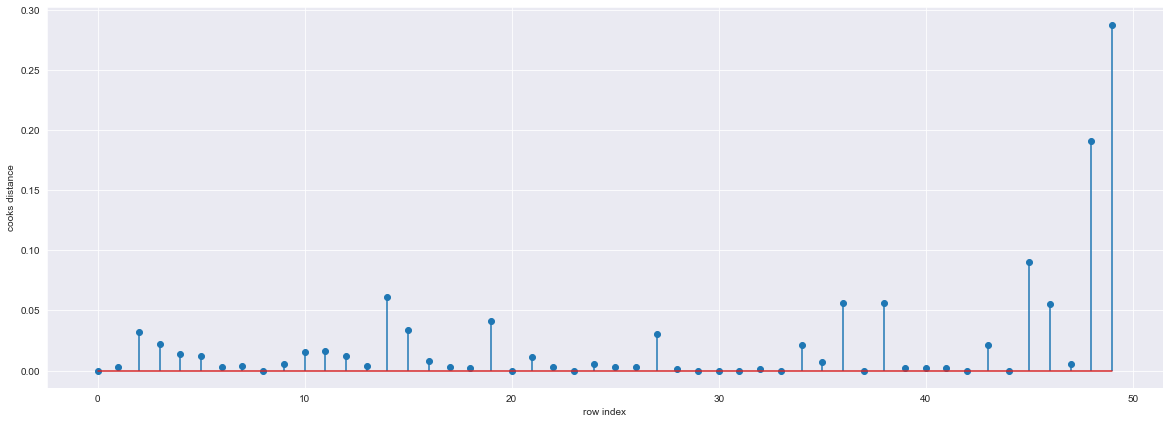

In [35]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [36]:
(np.argmax(c), np.max(c))

(49, 0.2880822927543272)

In [38]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.36

In [39]:
data1 = data.drop(data.index[49],axis = 0). reset_index()

In [42]:
data1.drop('index',axis=1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [46]:
rd1=pd.DataFrame(data1['R&D Spend'])
ms1=pd.DataFrame(data1['Marketing Spend'])

In [49]:
model1 = smf.ols('Profit~rd1+ms1+Administration', data = data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           8.85e-32
Time:                        12:13:24   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rd1                0.7830      0.038     20.470      0.000       0.706       0.860
ms1                0.0252      0.014      1.825      0.075      -0.003       0.053
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
model2_influence = model2.get_influence()
(c_2,_) = model2_influence.cooks_distance

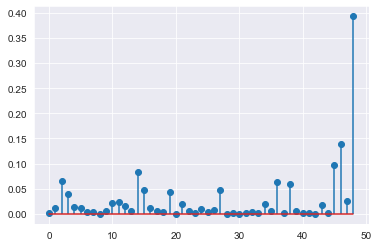

In [53]:
plt.stem(np.arange(len(data1)), np.round(c_2,3))
plt.show()

In [55]:
(np.argmax(c_2), np.max(c_2))

(48, 0.3927442055632143)

Since, the value is less than 1 We can stop the diagnostic process and finalize the model

In [61]:
r1 = model.rsquared

In [62]:
r2 = model1.rsquared

In [63]:
d1 = {'Model':['model', 'model1'], 'Rsqare': [r1,r2]}

In [ ]:
rsq = pd.DataFrame(d1)
rsq

As mentioned in the qestion, the rsq is the table for the rsqare values in the created models.


# Prediction

In [76]:
pred_y = model1.predict(data1)
pred_y

In [78]:
data1 = pd.DataFrame(data1).insert('Updates Profit',  pred_y)

TypeError: insert() missing 1 required positional argument: 'value'

In [83]:
data1 = data1.drop('index',axis=1)


KeyError: "['index'] not found in axis"

In [85]:
data1['Updated_Profit'] = pred_y

In [87]:
data1

,R&D Spend,Administration,Marketing Spend,State,Profit,Updated_Profit
0,165349.20,136897.80,471784.10,New York,192261.83,190716.676999
1,162597.70,151377.59,443898.53,California,191792.06,187537.122227
2,153441.51,101145.55,407934.54,Florida,191050.39,180575.526396
3,144372.41,118671.85,383199.62,New York,182901.99,172461.144642
4,142107.34,91391.77,366168.42,Florida,166187.94,170863.486721
5,131876.90,99814.71,362861.36,New York,156991.12,162582.583177
6,134615.46,147198.87,127716.82,California,156122.51,157741.338633
7,130298.13,145530.06,323876.68,Florida,155752.60,159347.735318
8,120542.52,148718.95,311613.29,New York,152211.77,151328.826941
9,123334.88,108679.17,304981.62,California,149759.96,154236.846778
